### Uber Pickups Analysis

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [25]:
import pandas as pd
df = pd.read_csv('./uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [28]:
# Convert the 'Date/Time' column to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


In [30]:
# Group by date and count the number of pickups
pickups_by_date=df.groupby(df['Date/Time'].dt.date).size()

# Find the date with the highest number of pickups
result = pickups_by_date.idxmax()
print("Date with most number of Uber pickups:", result)
print("Value:", pickups_by_date.max())

Date with most number of Uber pickups: 2014-08-07
Value: 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [35]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

# dt.day().value_counts().sort_index()

# Get the count of pickups on the highest date

print("Count of pickups on the highest date: ", pickups_by_date.max())


Count of pickups on the highest date:  32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [36]:
# Count the number of unique TLC base companies

print("Number of unique TLC Base companies:", df['Base'].nunique())


Number of unique TLC Base companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [38]:
# Group by TLC base company and count the number of pickups

pickups_by_company = df.groupby('Base').size()
print(pickups_by_company.max())

# Find the TLC base company with the highest number of pickups

result = pickups_by_company.idxmax()
print("TLC Base company with the highest number of pickups:", result)


355803
TLC Base company with the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [39]:
# Group by TLC base company and count the number of pickups

df.groupby('Base').size()


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [42]:
# Extract the hour from the 'Date/Time' column

df['Hour']= df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickups_by_hour = df.groupby(df['Hour']).size()

# Find the hour with the highest number of pickups
result = pickups_by_hour.idxmax()
print("The hour with the highest number of pickups:", result)



The hour with the highest number of pickups: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0, 0.5, 'No. of pickups')

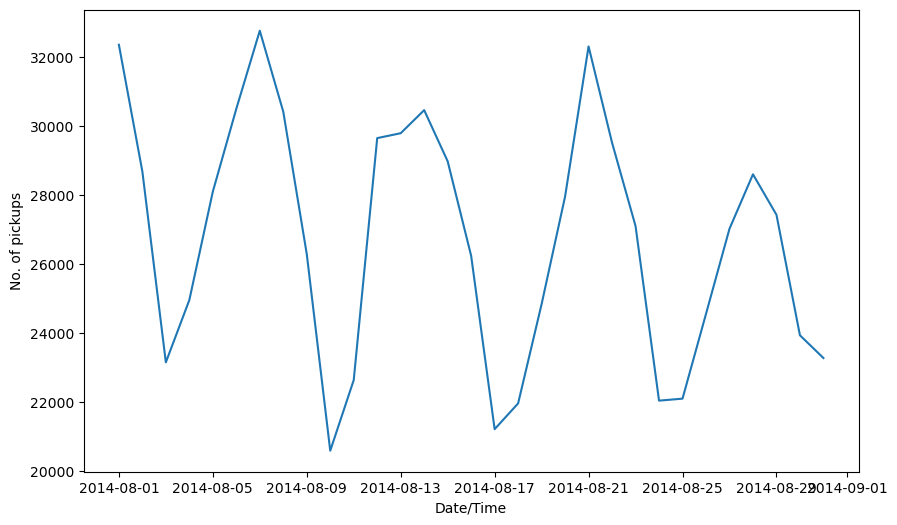

In [8]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
pickups_by_date.plot(kind='line', figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Number of pickups")

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0.5, 1.0, 'Distribution of Uber pickups by Latitude and Longitude')

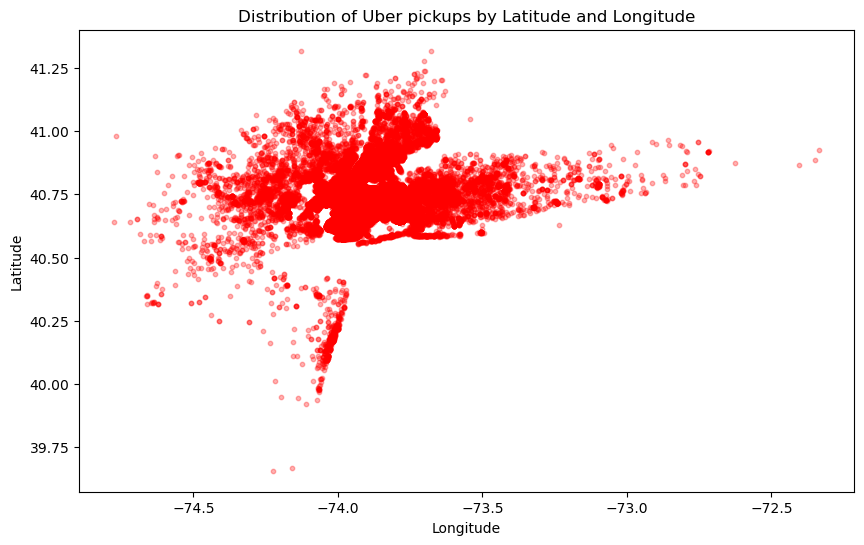

In [14]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

plt.figure(figsize=(10,6))
plt.scatter(df['Lon'], df['Lat'], s=10, alpha=0.3, color='red')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Uber pickups by Latitude and Longitude")

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'Number of Uber pickups for each TLC base company')

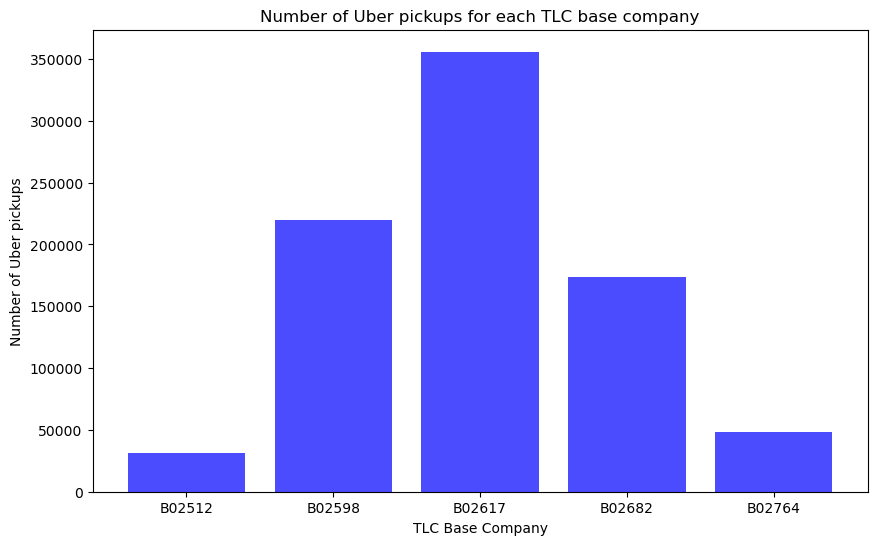

In [19]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company

pickup_by_base = df.groupby('Base').size()
plt.figure(figsize = (10,6))
plt.bar(pickup_by_base.index, pickup_by_base.values, alpha=0.7, color='blue')
plt.xlabel("TLC Base Company")
plt.ylabel("Number of Uber pickups")
plt.title("Number of Uber pickups for each TLC base company")

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage distribution of Uber pickups by day of the week')

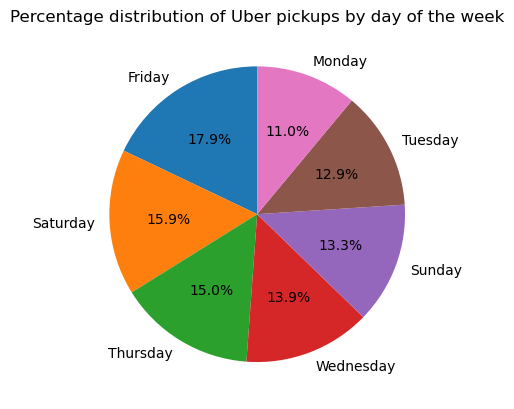

In [23]:
# Group by day of the week and count the number of pickups
pickups_by_day  = df['Date/Time'].dt.day_name().value_counts()


# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x=pickups_by_day.values, labels = pickups_by_day.index, autopct = '%1.1f%%', startangle=90)
plt.title("Percentage distribution of Uber pickups by day of the week")